# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

620


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#setting up url information
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_url = f"{url}appid={weather_api_key}&units={units}&q="
# Build a url to ensure connection and list the data partial query URL
#query_url = url + '&units=' + units + "&q=" + city + '&appid='+ api_key
# x = requests.get(weather_url + city)
# x = x.json()
# print(json.dumps(x, indent=4, sort_keys=True))

In [8]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 1
city_set = 1

In [9]:
#Retrieve the location information from the weather API 
print('Beginning Data Retrieval')     
print('-----------------------------')

for city in cities:
    print(f'Processing record {count} of set {city_set} | {city}')
     
    response = requests.get(weather_url + city).json()    
    #print(json.dumps(response, indent=4, sort_keys=True))   
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if count < 50:
            count = count + 1
        else:
            count = 1
            city_set = city_set + 1
        
    except Exception as e:
        # Append null values
        print(e)
        print(f"City {city} not found. Skipping...")
        count = count + 1
        pass
print('-----------------------------')                         
print('Data Retrieval Complete')    
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | hirara
Processing record 2 of set 1 | kodiak
Processing record 3 of set 1 | walvis bay
Processing record 4 of set 1 | turukhansk
Processing record 5 of set 1 | nikolskoye
Processing record 6 of set 1 | jamestown
Processing record 7 of set 1 | antofagasta
Processing record 8 of set 1 | komsomolskiy
Processing record 9 of set 1 | mattru
Processing record 10 of set 1 | qaanaaq
Processing record 11 of set 1 | cape town
Processing record 12 of set 1 | upernavik
Processing record 13 of set 1 | itoman
Processing record 14 of set 1 | mataura
Processing record 15 of set 1 | bluff
Processing record 16 of set 1 | chuy
Processing record 17 of set 1 | guerrero negro
Processing record 18 of set 1 | bukama
Processing record 19 of set 1 | bredasdorp
Processing record 20 of set 1 | yarada
Processing record 21 of set 1 | solovetskiy
'name'
City solovetskiy not found. Skipping...
Processing record 22 of set 1 | lebu
Pro

Processing record 35 of set 4 | hyeres
Processing record 36 of set 4 | abdanan
Processing record 37 of set 4 | tumannyy
'name'
City tumannyy not found. Skipping...
Processing record 38 of set 4 | boende
Processing record 39 of set 4 | billings
Processing record 40 of set 4 | hami
Processing record 41 of set 4 | turnov
Processing record 42 of set 4 | gamba
Processing record 43 of set 4 | nador
Processing record 44 of set 4 | shelopugino
Processing record 45 of set 4 | seoul
Processing record 46 of set 4 | saint george
Processing record 47 of set 4 | tual
Processing record 48 of set 4 | bucerias
Processing record 49 of set 4 | griffith
Processing record 50 of set 4 | baruun-urt
Processing record 1 of set 5 | lisala
Processing record 2 of set 5 | nome
Processing record 3 of set 5 | ponta do sol
Processing record 4 of set 5 | lumeje
Processing record 5 of set 5 | olinda
Processing record 6 of set 5 | iqaluit
Processing record 7 of set 5 | atuona
Processing record 8 of set 5 | cidreira
Proc

Processing record 17 of set 8 | never
Processing record 18 of set 8 | tongren
Processing record 19 of set 8 | karaul
'name'
City karaul not found. Skipping...
Processing record 20 of set 8 | jinchang
Processing record 21 of set 8 | huangzhou
Processing record 22 of set 8 | eregli
Processing record 23 of set 8 | lodwar
Processing record 24 of set 8 | thai binh
Processing record 25 of set 8 | novopokrovka
Processing record 26 of set 8 | kudirkos naumiestis
Processing record 27 of set 8 | ajdabiya
Processing record 28 of set 8 | mayo
Processing record 29 of set 8 | christchurch
Processing record 30 of set 8 | buenos aires
Processing record 31 of set 8 | tecoanapa
Processing record 32 of set 8 | cockburn town
Processing record 33 of set 8 | anadyr
Processing record 34 of set 8 | talnakh
Processing record 35 of set 8 | conceicao do araguaia
Processing record 36 of set 8 | izhevskoye
Processing record 37 of set 8 | rungata
'name'
City rungata not found. Skipping...
Processing record 38 of se

Processing record 45 of set 11 | kholtoson
Processing record 46 of set 11 | juba
Processing record 47 of set 11 | aktau
Processing record 48 of set 11 | kavaratti
Processing record 49 of set 11 | sao lourenco do sul
Processing record 50 of set 11 | villablino
Processing record 1 of set 12 | shangqiu
Processing record 2 of set 12 | praia da vitoria
Processing record 3 of set 12 | sao francisco
Processing record 4 of set 12 | otane
Processing record 5 of set 12 | linkoping
Processing record 6 of set 12 | wang saphung
Processing record 7 of set 12 | pontianak
Processing record 8 of set 12 | kirovo-chepetsk
Processing record 9 of set 12 | ponta delgada
Processing record 10 of set 12 | lotoshino
Processing record 11 of set 12 | carballo
Processing record 12 of set 12 | la ronge
Processing record 13 of set 12 | puerto leguizamo
Processing record 14 of set 12 | ndola
Processing record 15 of set 12 | buala
Processing record 16 of set 12 | madaoua
Processing record 17 of set 12 | ventspils
Proc

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadhoo
...
Processing Record 32 of Set 4 | plettenberg bay
Processing Record 33 of Set 4 | lorengau
Processing Record 34 of Set 4 | hay river
Processing Record 35 of Set 4 | kodiak

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#create dictionary with weather data
weather_data = {'City': city_name, 'Lat':lat, 'Lng': lng, 'Max Temp': max_temp, 
              'Humidity':humidity, 'Cloudiness': cloudiness, 'Wind Speed':wind_speed, 'Country': country,
              'Date':date}
weather_df = pd.DataFrame(weather_data)

#create CSV file 
weather_df.to_csv('WeatherPy.csv', index=False) 
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hirara,24.8000,125.2833,80.28,89,97,8.28,JP,1666383577
1,Saint Paul Harbor,57.7900,-152.4072,49.51,46,0,17.27,US,1666383578
2,Walvis Bay,-22.9575,14.5053,61.75,82,1,9.22,NA,1666383578
3,Turukhansk,65.8167,87.9833,33.91,98,100,18.41,RU,1666383578
4,Nikolskoye,59.7035,30.7861,42.69,93,100,3.27,RU,1666383579


In [11]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,20.054105,17.077043,61.725835,70.885764,56.801406,8.156134,1.666384e+09
std,33.164974,91.023686,19.945188,22.945802,41.113690,5.909848,1.023661e+02
min,-54.800000,-179.166700,-5.420000,12.000000,0.000000,0.000000,1.666383e+09
25%,-7.963100,-58.736800,46.900000,58.000000,10.000000,3.670000,1.666384e+09
50%,24.687700,22.636700,66.830000,78.000000,75.000000,6.710000,1.666384e+09
75%,47.805900,92.170300,77.160000,88.000000,100.000000,11.100000,1.666384e+09
max,78.218600,179.316700,101.640000,100.000000,100.000000,37.890000,1.666384e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
#Checking DF for humidty over 100% 
humid_cities = weather_df[weather_df['Humidity'] >= 100]
humid_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
12,Itoman,26.1247,127.6694,77.77,100,75,3.44,JP,1666383581
58,Kiunga,-6.1219,141.2906,72.91,100,100,2.28,PG,1666383595
157,Clyde River,70.4692,-68.5914,26.83,100,100,13.80,CA,1666383635
164,Gushikawa,26.3544,127.8686,77.00,100,75,3.44,JP,1666383638
180,Seoul,37.5683,126.9778,53.04,100,85,1.14,KR,1666383445


In [13]:
#Identify the number of cities that have humidity over 100% and the index numbers.
print(len(humid_cities))
print(humid_cities.index)

12
Int64Index([12, 58, 157, 164, 180, 229, 276, 284, 308, 394, 416, 510], dtype='int64')


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(humid_cities.index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hirara,24.8000,125.2833,80.28,89,97,8.28,JP,1666383577
1,Saint Paul Harbor,57.7900,-152.4072,49.51,46,0,17.27,US,1666383578
2,Walvis Bay,-22.9575,14.5053,61.75,82,1,9.22,NA,1666383578
3,Turukhansk,65.8167,87.9833,33.91,98,100,18.41,RU,1666383578
4,Nikolskoye,59.7035,30.7861,42.69,93,100,3.27,RU,1666383579


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

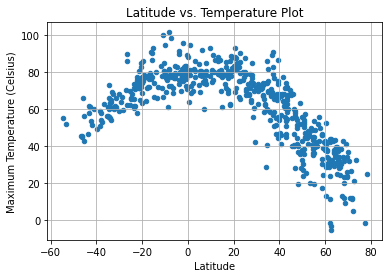

In [15]:
clean_city_data.plot('Lat', 'Max Temp', kind='scatter')
# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celsius)")

plt.grid(True)

# Save the figure
plt.savefig("Latitude_v_Temperature_Plot.png")

# Show plot
plt.show()

The scatter plot above shows the temperatures at different latitudes arround the globe. From the plot you can see that the closer you get to the equator,transition from negative to positive Latitude, the higher the temperature gets. 

## Latitude vs. Humidity Plot

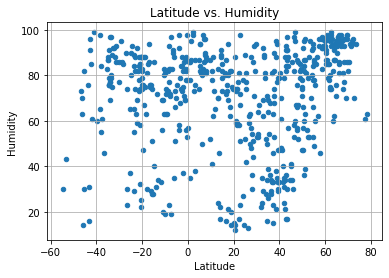

In [16]:
clean_city_data.plot('Lat', 'Humidity', kind='scatter')
# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_v_Humidity_Plot.png")

# Show plot
plt.show()

The plot above represents the humidity levels at different latitudes around the globe. The plot shows that humidity levels range from 0 to 100 at all Latitudes to include the equator. There appears to be a cluster of high humidity readings in the Northern Hemisphere north of 60 degrees. 

## Latitude vs. Cloudiness Plot

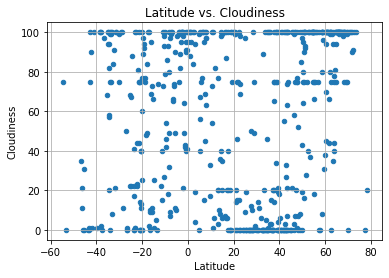

In [17]:
clean_city_data.plot('Lat', 'Cloudiness', kind='scatter')
# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(True)

# Save the figure
plt.savefig("Latitude_v_Cloudiness_Plot.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

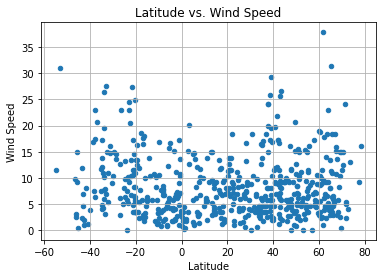

In [18]:
clean_city_data.plot('Lat', 'Wind Speed', kind='scatter')
# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(True)

# Save the figure
plt.savefig("Latitude_v_WindSpeed_Plot.png")

# Show plot
plt.show()

Simialr to the humidty, wind speed and cloudiness levels appear to be similar regardles of latitiude. There does appear to be an increase in cloudiness and windspeed at 60 degrees Latitiude and higher. 

## Linear Regression

In [19]:
#create new DFs for northern and southern hemishperes 
northern_hem = clean_city_data[clean_city_data['Lat'] >0]
southern_hem = clean_city_data[clean_city_data['Lat'] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8508161662528535


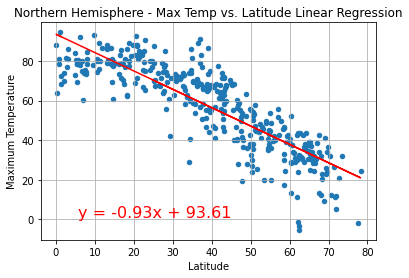

In [21]:
northern_hem.plot('Lat','Max Temp', kind='scatter')
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'],northern_hem['Max Temp'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8),fontsize=16,color="red")
plt.plot(northern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("N_Hemisphere_MaxTemp_v_Lat_LinearRegressionPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.763386130846201


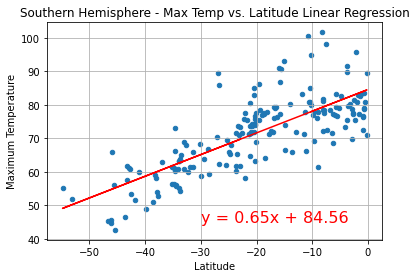

In [29]:
southern_hem.plot('Lat','Max Temp', kind='scatter')
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'],southern_hem['Max Temp'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq2,(-30,45),fontsize=16,color="red")
plt.plot(southern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("S_Hemisphere_MaxTemp_vLat_LinearRegressionPlot.png")

# Show plot
plt.show()

The linear regression models of max temp in the Northern and Southern Hemishperes reinforce the previously mentioned conclusion that the temperature rises as you get closer to the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2530623534738637


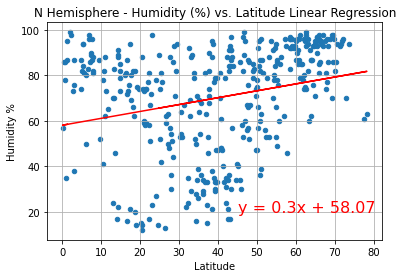

In [33]:
northern_hem.plot('Lat','Humidity', kind='scatter')
# Incorporate the other graph properties
plt.title("N Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'], northern_hem['Humidity'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq3,(45,20),fontsize=16,color="red")
plt.plot(northern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("NHemisphere_Humidity_v_Lat_Linear_RegressionPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.025435630481169872


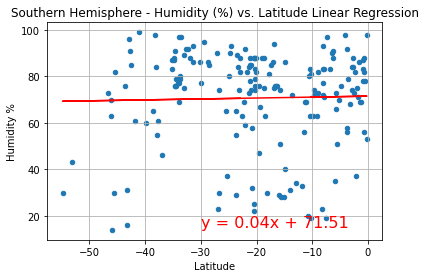

In [37]:
southern_hem.plot('Lat','Humidity', kind='scatter')
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'],southern_hem['Humidity'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq4,(-30,15),fontsize=16,color="red")
plt.plot(southern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("SHemisphere_Humidity_v_Lat_Linear_Regression.png")

# Show plot
plt.show()

It may be hard to see in the Humidity plot, but the line of the equation in the Southern Hemishpere shows that as x increases, y also increases. The increasing trend is even greater once you move in to the Northern Hemishpere. This means that the humidty rises as you progress from the Southern to Northern Hemispheres. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26492474116356074


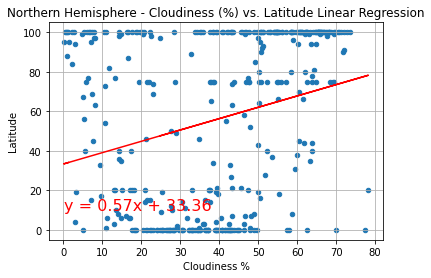

In [40]:
northern_hem.plot('Lat', 'Cloudiness', kind='scatter')
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid(True)
#Regression set-up
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'], northern_hem['Cloudiness'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq5,(0.1,10),fontsize=16,color="red")
plt.plot(northern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("NHem_Cloudiness_v_Latitude__Plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19011153026456476


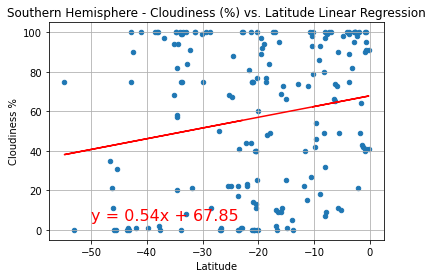

In [44]:
southern_hem.plot('Lat','Cloudiness', kind='scatter')
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.grid(True)
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'], southern_hem['Cloudiness'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq6,(-50,5),fontsize=16,color="red")
plt.plot(southern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("SHem_Cloudiness_v_Latitude_Plot.png")

# Show plot
plt.show()

The assessment of cloudiness is similar to the humidty assessment. Humidity rises as you move from the Southern to Northern Hemishperes 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14330200209625477


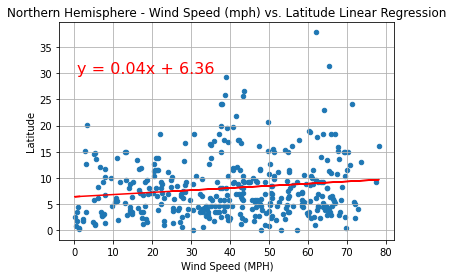

In [48]:
northern_hem.plot('Lat','Wind Speed', kind='scatter')
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.grid(True)
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem['Lat'], northern_hem['Wind Speed'])
regress_values = northern_hem['Lat'] * slope + intercept
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq7,(0.8,30),fontsize=16,color="red")
plt.plot(northern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("NHem_WindSpeed_v_Lat_LinearRegPlot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24683802819343353


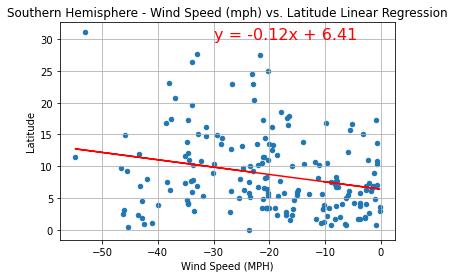

In [51]:
southern_hem.plot('Lat','Wind Speed',  kind='scatter')
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.grid(True)
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem['Lat'], southern_hem['Wind Speed'])
regress_values = southern_hem['Lat'] * slope + intercept
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq8,(-30,30),fontsize=16,color="red")
plt.plot(southern_hem['Lat'],regress_values,"r-")
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("SHem_WindSpeed_v_Lat_LinearRegPlot.png")

# Show plot
plt.show()

Windspeed in the Southern Hemisphere decreases as it apporaches the equator while it increases once you cross the equator into the Northern Hemishpere

In summary, as you approach the equator, there is an increase in maximum temperature and a decrease in wind speed. Cloud cover and humidty rise gradually as you move from the Southern Hemishepere across the equator and into the Northern Hemishpere. 